<a href="http://agrum.org" target="blank"><img src="http://agrum.gitlab.io/theme/img/logoAgrum.png" align="left" style="height:100px"/></a><a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This pyAgrum's notebook is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.

In [1]:
import os

%matplotlib inline
from pylab import *
import matplotlib.pyplot as plt


In [2]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
gnb.configuration()

# Credal Net from BN

In [3]:
bn=gum.fastBN("A->B[3]->C<-D<-A->E->F")
bn_min=gum.BayesNet(bn)
bn_max=gum.BayesNet(bn)
for n in bn.nodes():
  x=0.4*min(bn.cpt(n).min(),1-bn.cpt(n).max())
  bn_min.cpt(n).translate(-x)
  bn_max.cpt(n).translate(x)
    
cn=gum.CredalNet(bn_min,bn_max)
cn.intervalToCredal()

gnb.sideBySide(bn.cpt("B"),bn_min.cpt("B"),bn_max.cpt("B"))
cn

(pyAgrum.CredalNet<double>@000001EBA61E42F0) 
A:Range([0,1])
<> : [[0.0461133 , 0.953887] , [0.1076 , 0.8924]]

B:Range([0,2])
<A:0> : [[0.0389462 , 0.473505 , 0.487549] , [0.0389462 , 0.499469 , 0.461585] , [0.0649116 , 0.499469 , 0.43562] , [0.0908748 , 0.473505 , 0.43562] , [0.0649099 , 0.447541 , 0.487549] , [0.0908748 , 0.447541 , 0.461584]]
<A:1> : [[0.329677 , 0.295395 , 0.374928] , [0.329677 , 0.321359 , 0.348964] , [0.355641 , 0.321359 , 0.323] , [0.381605 , 0.295395 , 0.323] , [0.355641 , 0.26943 , 0.374928] , [0.381605 , 0.26943 , 0.348965]]

C:Range([0,1])
<B:0|D:0> : [[0.482818 , 0.517182] , [0.511004 , 0.488996]]
<B:1|D:0> : [[0.237053 , 0.762947] , [0.265239 , 0.734761]]
<B:2|D:0> : [[0.369781 , 0.630219] , [0.397969 , 0.602031]]
<B:0|D:1> : [[0.950676 , 0.0493243] , [0.97886 , 0.0211397]]
<B:1|D:1> : [[0.314637 , 0.685363] , [0.342822 , 0.657178]]
<B:2|D:1> : [[0.727327 , 0.272673] , [0.755511 , 0.244489]]

D:Range([0,1])
<A:0> : [[0.101227 , 0.898773] , [0.236194 , 0.763806]]
<A:1> : [[0.379921 , 0.620079] , [0.51489 , 0.48511]]

E:Range([0,1])
<A:0> : [[0.852101 , 0.147899] , [0.936614 , 0.0633862]]
<A:1> : [[0.512193 , 0.487807] , [0.596708 , 0.403292]]

F:Range([0,1])
<E:0> : [[0.48662 , 0.51338] , [0.632985 , 0.367015]]
<E:1> : [[0.109774 , 0.890226] , [0.256137 , 0.743863]]

#### We can use LBP on CN (L2U) only for binary credal networks (here B is not binary). We then propose the classical binarization (but warn the user that this leads to approximation in the inference)

In [4]:
cn2=gum.CredalNet(bn_min,bn_max)
cn2.intervalToCredal()
cn2.approximatedBinarization()
cn2.computeBinaryCPTMinMax()

gnb.sideBySide(cn,cn2)

Here, $B$ becomes 
- $B$-b$i$ : the $i$-th bit of B
- instrumental $B$-v$k$ : the indicator variable for each modality $k$ of $B$

In [5]:
ie_mc=gum.CNMonteCarloSampling(cn)
ie2_lbp=gum.CNLoopyPropagation(cn2)
ie2_mc=gum.CNMonteCarloSampling(cn2)

In [6]:
gnb.sideBySide(gnb.getInference(cn,engine=ie_mc),
               gnb.getInference(cn2,engine=ie2_mc),
               gnb.getInference(cn2,engine=ie2_lbp))

In [7]:
gnb.sideBySide(ie_mc.CN(),ie_mc.marginalMin("F"),ie_mc.marginalMax("F"))
gnb.sideBySide(ie_mc.CN(),ie2_lbp.marginalMin("F"),ie2_lbp.marginalMax("F"))
print(cn)


A:Range([0,1])
<> : [[0.0461133 , 0.953887] , [0.1076 , 0.8924]]

B:Range([0,2])
<A:0> : [[0.0389462 , 0.473505 , 0.487549] , [0.0389462 , 0.499469 , 0.461585] , [0.0649116 , 0.499469 , 0.43562] , [0.0908748 , 0.473505 , 0.43562] , [0.0649099 , 0.447541 , 0.487549] , [0.0908748 , 0.447541 , 0.461584]]
<A:1> : [[0.329677 , 0.295395 , 0.374928] , [0.329677 , 0.321359 , 0.348964] , [0.355641 , 0.321359 , 0.323] , [0.381605 , 0.295395 , 0.323] , [0.355641 , 0.26943 , 0.374928] , [0.381605 , 0.26943 , 0.348965]]

C:Range([0,1])
<B:0|D:0> : [[0.482818 , 0.517182] , [0.511004 , 0.488996]]
<B:1|D:0> : [[0.237053 , 0.762947] , [0.265239 , 0.734761]]
<B:2|D:0> : [[0.369781 , 0.630219] , [0.397969 , 0.602031]]
<B:0|D:1> : [[0.950676 , 0.0493243] , [0.97886 , 0.0211397]]
<B:1|D:1> : [[0.314637 , 0.685363] , [0.342822 , 0.657178]]
<B:2|D:1> : [[0.727327 , 0.272673] , [0.755511 , 0.244489]]

D:Range([0,1])
<A:0> : [[0.101227 , 0.898773] , [0.236194 , 0.763806]]
<A:1> : [[0.379921 , 0.620079] , [0.5

## Credal Net from bif files

In [8]:
cn=gum.CredalNet("res/cn/2Umin.bif","res/cn/2Umax.bif")
cn.intervalToCredal()

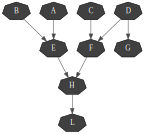

In [9]:
gnb.showCN(cn,"2")

In [10]:
ie=gum.CNMonteCarloSampling(cn)
ie.insertEvidenceFile("res/cn/L2U.evi")

In [11]:
ie.setRepetitiveInd(False)
ie.setMaxTime(1)
ie.setMaxIter(1000)

ie.makeInference()

In [12]:
gnb.sideBySide(cn,gnb.getInference(cn,targets={"A","H","L","D"},engine=ie,evs={"L":[0,1],"G":[1,0]}))

# Comparing inference in credal networks

In [13]:
import pyAgrum as gum

def showDiffInference(model,mc,lbp):
    for i in model.current_bn().nodes():
        a,b=mc.marginalMin(i)[:]
        c,d=mc.marginalMax(i)[:]
        
        e,f=lbp.marginalMin(i)[:]
        g,h=lbp.marginalMax(i)[:]
        
        plt.scatter([a,b,c,d],[e,f,g,h])
        

cn=gum.CredalNet("res/cn/2Umin.bif","res/cn/2Umax.bif")
cn.intervalToCredal()

#### The two inference give quite the same result

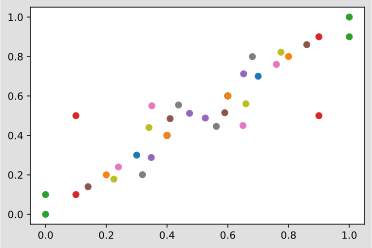

In [14]:
ie_mc=gum.CNMonteCarloSampling(cn)
ie_mc.makeInference()

cn.computeBinaryCPTMinMax()
ie_lbp=gum.CNLoopyPropagation(cn)
ie_lbp.makeInference()

showDiffInference(cn,ie_mc,ie_lbp)

#### but not when evidence are inserted

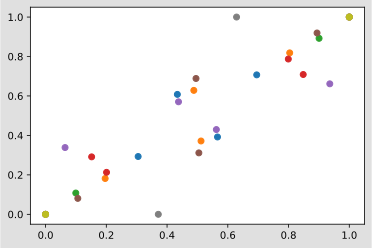

In [15]:
ie_mc=gum.CNMonteCarloSampling(cn)
ie_mc.insertEvidenceFile("res/cn/L2U.evi")
ie_mc.makeInference()

ie_lbp=gum.CNLoopyPropagation(cn)
ie_lbp.insertEvidenceFile("res/cn/L2U.evi")
ie_lbp.makeInference()

showDiffInference(cn,ie_mc,ie_lbp)


## Dynamical Credal Net

In [16]:
cn=gum.CredalNet("res/cn/bn_c_8.bif","res/cn/den_c_8.bif")
cn.bnToCredal(0.8,False)

In [17]:
ie=gum.CNMonteCarloSampling(cn)
ie.insertModalsFile("res/cn/modalities.modal")

ie.setRepetitiveInd(True)
ie.setMaxTime(30)
ie.setMaxIter(1000)

ie.makeInference()

In [18]:
print(ie.dynamicExpMax("temp"))

(14.203404645414896, 11.537534028846544, 11.975872407675427, 11.896583956121429, 11.878306821734771, 11.893801234291967, 11.888524791710616, 11.889469448341735, 11.889530396098476)


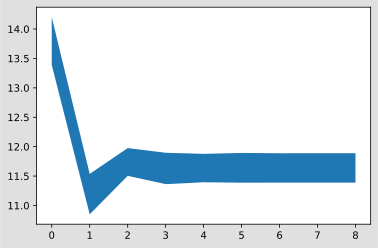

In [19]:
fig=figure()
ax=fig.add_subplot(111)
ax.fill_between(range(9),ie.dynamicExpMax("temp"),ie.dynamicExpMin("temp"))

In [20]:
ie=gum.CNMonteCarloSampling(cn)
ie.insertModalsFile("res/cn/modalities.modal")

ie.setRepetitiveInd(False)
ie.setMaxTime(30)
ie.setMaxIter(1000)

ie.makeInference()


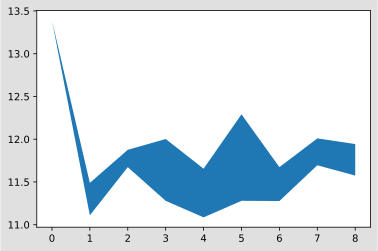

In [21]:
fig=figure()
ax=fig.add_subplot(111)
ax.fill_between(range(9),ie.dynamicExpMax("temp"),ie.dynamicExpMin("temp"))

stopped with epsilon=0


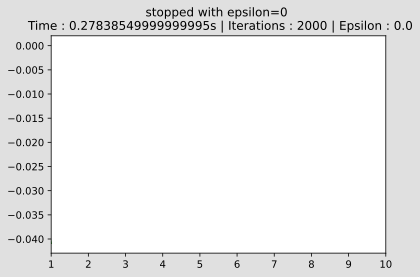

In [22]:
ie=gum.CNMonteCarloSampling(cn)
ie.insertModalsFile("res/cn/modalities.modal")

ie.setRepetitiveInd(False)
ie.setMaxTime(30)
ie.setMaxIter(5000)

gnb.animApproximationScheme(ie)
ie.makeInference()
print(ie.messageApproximationScheme())

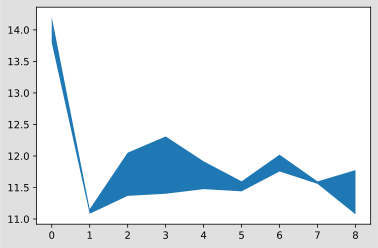

In [23]:
fig=figure()
ax=fig.add_subplot(111)
ax.fill_between(range(9),ie.dynamicExpMax("temp"),ie.dynamicExpMin("temp"));